<h2 align="center">Лабораторна робота №2</h2>
<h5 align="right">Роботу виконав студент групи ФІ-21, Беркута Володимир</h5>
<p><b><i>Тема роботи:</i></b> "Базові методи й алгоритми ройового інтелекту, їх застосування для знаходження глобальних екстремумів багатовимірних функцій дійсної змінної".</p>
<p><b><i>Мета роботи:</i></b> опанувати принципи роботи наведених у роботі алгоритмів ройового інтелекту (алгоритм оптимізації роєм частинок, бджолиний алгоритм оптимізації, світлячковий алгоритм оптимізації), опис яких наведено у даній роботі. Розробити відповідне програмне забезпечення знаходження глобаних екстремумів функцій у задачах умовної й безумовної багатовимірної онокритеріальної оптимізації.</p>

### Завдання до лабораторної роботи

- Ознайомитись з теоретичними відомостями до кожного з розглянутих алгоритмів (алгоритм оптимізації роєм частинок, бджолиний алгоритм оптимізації, алгоритм оптимізації роєм світлячків).
- Розробити програмне забезпечення (мова програмування і середовище розробки за вибором студента) для текстування описаних вище алгоритмів для знаходження глобального екстремуму функції Растринга (безумовна оптимізація, підрозділ 4.1 даної роботи). Взяти розмірність задачі $n=2, n=5, n=10, n=15$. Подати результати тестування у вигляді графіків, як у попередній роботі. Кількість запусків програмного застосунку для 3-х алгоритмів будь-яке (на вибір студента).
- Модифікувати програми так (для трьох алгоритів), щоб можна було бачити процес пошуку глобального екстремуму функцій з обмеженнями, які наведені далі у 4-му розділі даної роботи. Взяти дві на вибір функції. Показати динаміку збіжності кожного з методів на поставлених задачах.
- Модифікувати програми для вирішення прикладного завдання (трьома алгоритмами), оптимізаційна математична модель якого наведена у підрозділі 5.1 даної роботи. Подати результати так само, як для завдання з попереднього пункту.
- Адаптувати програми для вирішення прикладного завдання (трьома алгоритмами), оптимізаційна математична модель якого наведена у підрозділі 5.2 даної роботи. Подати результати так само, як для завдання з попереднього пункту.
- Зробити висновки до отриманих результатів
- Захистити лабораторну роботу у викладача :)

In [1]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import SwarmAlgroithims as sw
import numpy as np
import copy
import sys

### Функція Растринга

In [2]:
def Rastring(x):
    A = 10    
    return A*len(x) + sum([(xi**2 - A*np.cos(2*np.pi*xi)) for xi in x])

In [3]:
bsf2 = sw.PSO(Rastring, 1000, 25, 2, [-5.12]*2, [5.12]*2, 1.5, 1.5)
bsf5 = sw.PSO(Rastring, 1000, 25, 5, [-5.12]*5, [5.12]*5, 1.5, 1.5)
bsf10 = sw.PSO(Rastring, 1000, 25, 10, [-5.12]*10, [5.12]*10, 1.5, 1.5)
bsf15 = sw.PSO(Rastring, 1000, 25, 15, [-5.12]*15, [5.12]*15, 1.5, 1.5)

C:\Users\berku\AppData\Local\Temp\ipykernel_27108\3762460384.py:24: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, frame)
C:\Users\berku\AppData\Local\Temp\ipykernel_27108\3762460384.py:24: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, frame)
C:\Users\berku\AppData\Local\Temp\ipykernel_27108\3762460384.py:24: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, frame)
C:\Users\berku\AppData\Local\Temp\ipykernel_27108\3762460384.py:24: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, frame)


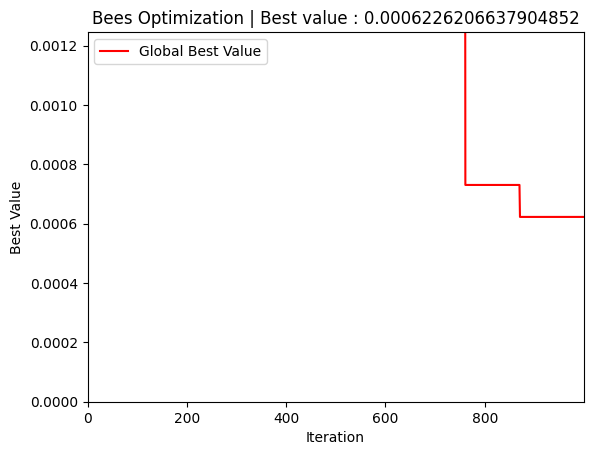

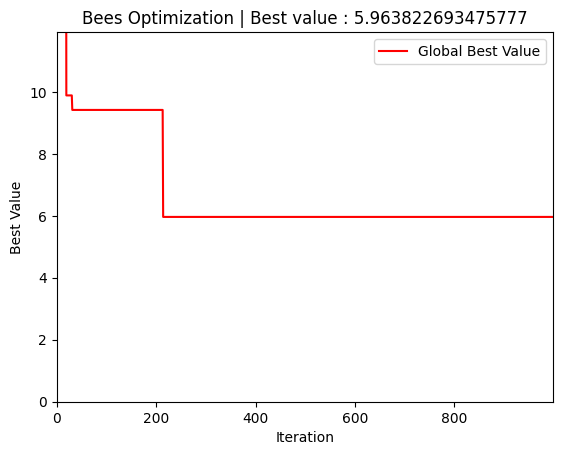

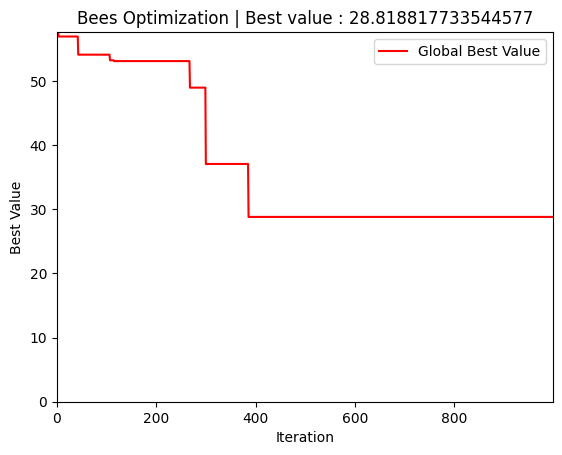

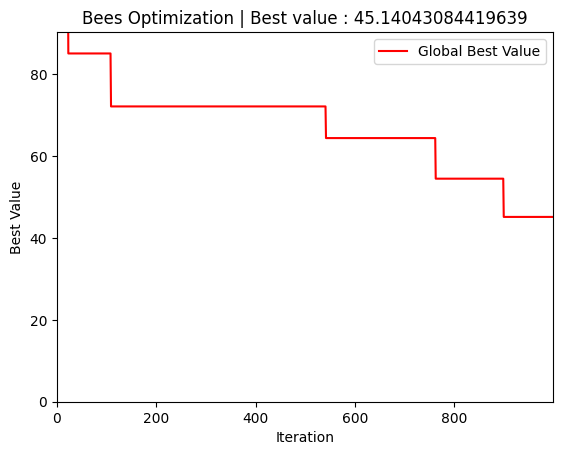

In [ ]:
bsf = [bsf2, bsf5, bsf10, bsf15]
ind = [2, 5, 10, 15]

for i in range(4):
    fig, ax = plt.subplots()
    xdata, ydata = [], []
    ln, = plt.plot([], [], 'r-', label='Global Best Value')

    ax.set_xlabel('Iteration')
    ax.set_ylabel('Best Value')
    ax.legend()

    def init():
        ax.set_title('PSO | Best value : ')
        return ln,

    def update(frame):
        xdata.append(frame)
        ydata.append(bsf[i][frame])
        if frame == 0:
            ax.set_title(f'PSO | Best value : {bsf[i][0]}')
        else:
            ax.set_title(f'PSO | Best value : {min(bsf[i][:frame])}')
        ax.set_xlim(0, frame)
        ax.set_ylim(0, 2 * bsf[i][frame])
        ln.set_data(xdata, ydata)
        return ln,

    
    # Створення анімації
    ani = FuncAnimation(fig, update, frames=range(len(bsf[i])), init_func=init, blit=True, interval=50)
    ani.save(f"R_PSO_{ind[i]}.gif", fps = 12)


In [5]:
bbf2 = sw.BA(Rastring, 1000, 25, 2, [-5.12]*2, [5.12]*2, 15, 10)
bbf5 = sw.BA(Rastring, 1000, 25, 5, [-5.12]*5, [5.12]*5, 15, 10)
bbf10 = sw.BA(Rastring, 1000, 25, 10, [-5.12]*10, [5.12]*10, 15, 10)
bbf15 = sw.BA(Rastring, 1000, 25, 15, [-5.12]*15, [5.12]*15, 15, 10)

C:\Users\berku\AppData\Local\Temp\ipykernel_27108\495535866.py:23: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, frame)
C:\Users\berku\AppData\Local\Temp\ipykernel_27108\495535866.py:23: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, frame)
C:\Users\berku\AppData\Local\Temp\ipykernel_27108\495535866.py:23: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, frame)
C:\Users\berku\AppData\Local\Temp\ipykernel_27108\495535866.py:23: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, frame)


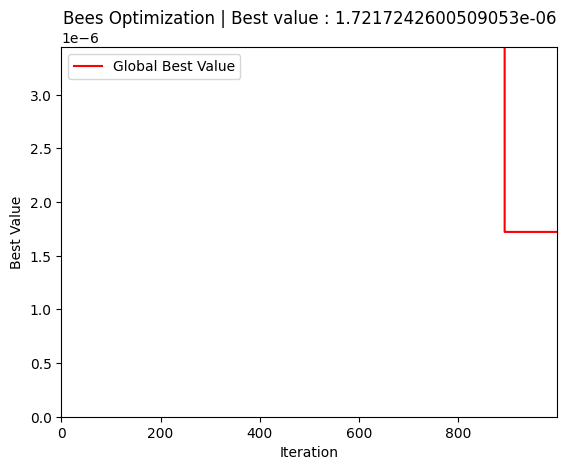

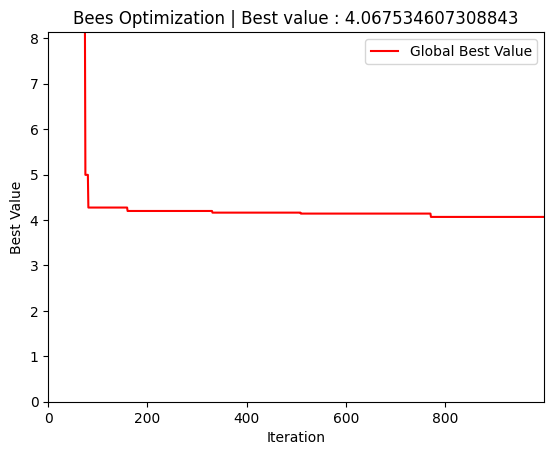

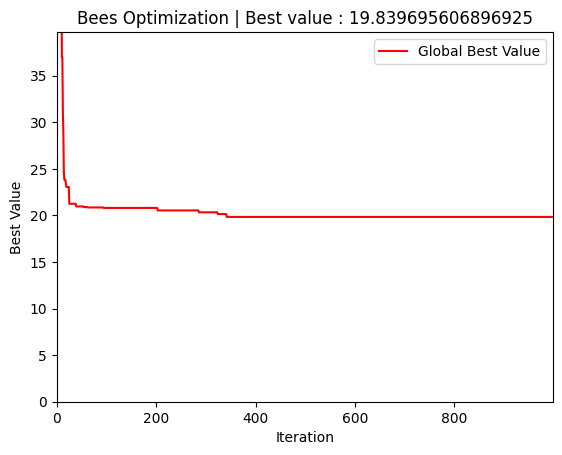

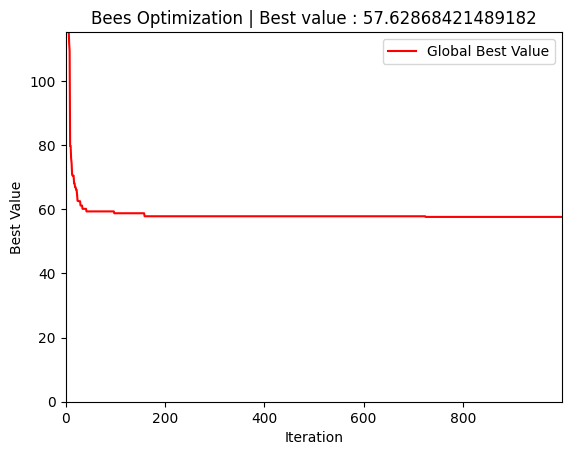

In [6]:
bbf = [bbf2, bbf5, bbf10, bbf15]

for i in range(4):
    fig, ax = plt.subplots()
    xdata, ydata = [], []
    ln, = plt.plot([], [], 'r-', label='Global Best Value')

    ax.set_xlabel('Iteration')
    ax.set_ylabel('Best Value')
    ax.legend()

    def init():
        ax.set_title(f'Bees Optimization | Best value : ')
        return ln,

    def update(frame):
        xdata.append(frame)
        ydata.append(bbf[i][frame])
        if frame == 0:
            ax.set_title(f'Bees Optimization | Best value : {bbf[i][0]}')
        else:
            ax.set_title(f'Bees Optimization | Best value : {min(bbf[i][:frame])}')
        ax.set_xlim(0, frame)
        ax.set_ylim(0, 2 * bbf[i][frame])
        ln.set_data(xdata, ydata)
        return ln,

    from matplotlib.animation import FuncAnimation
    # Створення анімації
    ani = FuncAnimation(fig, update, frames=range(len(bbf[i])), init_func=init, blit=True, interval=50)
    ani.save(f"R_BA_{ind[i]}.gif", fps = 12)

In [7]:
bfa2 = sw.FA(Rastring, 1000, 25, 2, [-5.12]*2, [5.12]*2)
bfa5 = sw.FA(Rastring, 1000, 25, 5, [-5.12]*5, [5.12]*5)
bfa10 = sw.FA(Rastring, 1000, 25, 10, [-5.12]*10, [5.12]*10)
bfa15 = sw.FA(Rastring, 1000, 25, 15, [-5.12]*15, [5.12]*15)

C:\Users\berku\AppData\Local\Temp\ipykernel_27108\3507040896.py:23: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, frame)
C:\Users\berku\AppData\Local\Temp\ipykernel_27108\3507040896.py:23: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, frame)
C:\Users\berku\AppData\Local\Temp\ipykernel_27108\3507040896.py:23: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, frame)
C:\Users\berku\AppData\Local\Temp\ipykernel_27108\3507040896.py:23: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, frame)


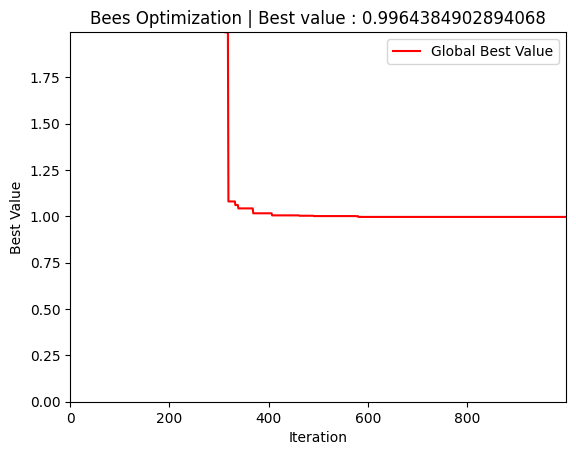

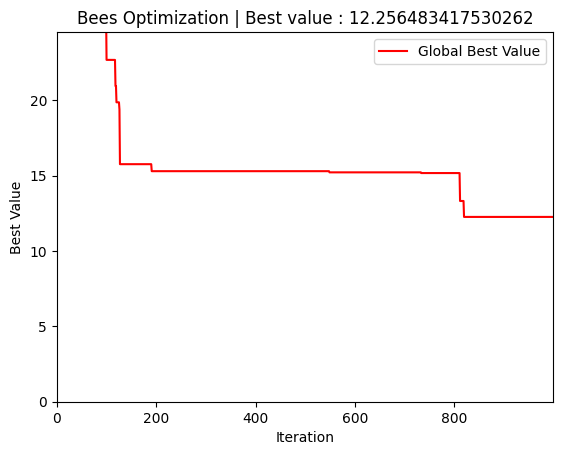

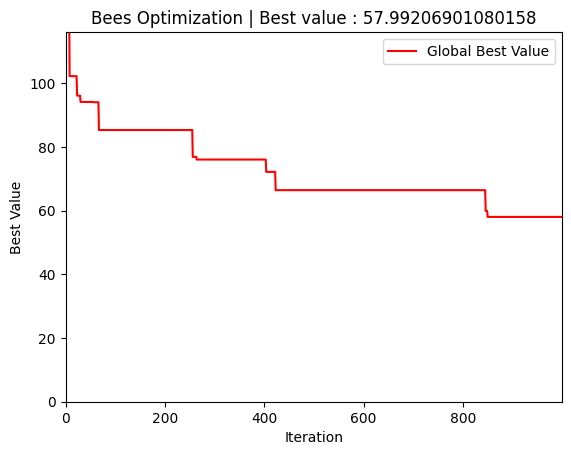

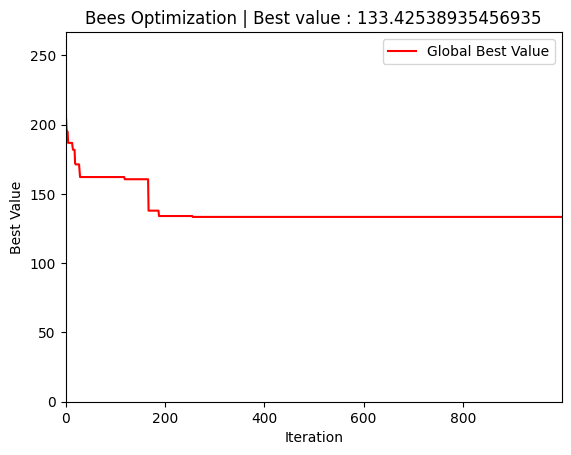

In [ ]:
bfa = [bfa2, bfa5, bfa10, bfa15]

for i in range(4):
    fig, ax = plt.subplots()
    xdata, ydata = [], []
    ln, = plt.plot([], [], 'r-', label='Global Best Value')

    ax.set_xlabel('Iteration')
    ax.set_ylabel('Best Value')
    ax.legend()

    def init():
        ax.set_title(f'Fireflies Optimization | Best value : ')
        return ln,

    def update(frame):
        xdata.append(frame)
        ydata.append(bfa[i][frame])
        if frame == 0:
            ax.set_title(f'Fireflies Optimization | Best value : {bfa[i][0]}')
        else:
            ax.set_title(f'Fireflies Optimization | Best value : {min(bfa[i][:frame])}')
        ax.set_xlim(0, frame)
        ax.set_ylim(0, 2 * bfa[i][frame])
        ln.set_data(xdata, ydata)
        return ln,

    from matplotlib.animation import FuncAnimation
    # Створення анімації
    ani = FuncAnimation(fig, update, frames=range(len(bfa[i])), init_func=init, blit=True, interval=50)
    ani.save(f"R_FA_{ind[i]}.gif", fps = 12)

##### Графік функцій разом

In [ ]:
for i in range(4):
    fig, ax = plt.subplots()
    xdata, ydata = [], []
    ln, = plt.plot([], [], 'r-', label='Global Best Value')

    ax.set_xlabel('Iteration')
    ax.set_ylabel('Best Value')
    ax.legend()

    def init():
        ax.set_title(f'Fireflies Optimization | Best value : ')
        return ln,

    def update(frame):
        xdata.append(frame)
        ydata.append(bfa[i][frame])
        if frame == 0:
            ax.set_title(f'Fireflies Optimization | Best value : {bfa[i][0]}')
        else:
            ax.set_title(f'Fireflies Optimization | Best value : {min(bfa[i][:frame])}')
        ax.set_xlim(0, frame)
        ax.set_ylim(0, 2 * bfa[i][frame])
        ln.set_data(xdata, ydata)
        return ln,

    from matplotlib.animation import FuncAnimation
    # Створення анімації
    ani = FuncAnimation(fig, update, frames=range(len(bfa[i])), init_func=init, blit=True, interval=50)
    ani.save(f"R_{ind[i]}.gif", fps = 12)

C:\Users\berku\AppData\Local\Temp\ipykernel_27108\1025721214.py:22: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, frame)
C:\Users\berku\AppData\Local\Temp\ipykernel_27108\1025721214.py:22: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, frame)
C:\Users\berku\AppData\Local\Temp\ipykernel_27108\1025721214.py:22: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, frame)
C:\Users\berku\AppData\Local\Temp\ipykernel_27108\1025721214.py:22: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, frame)


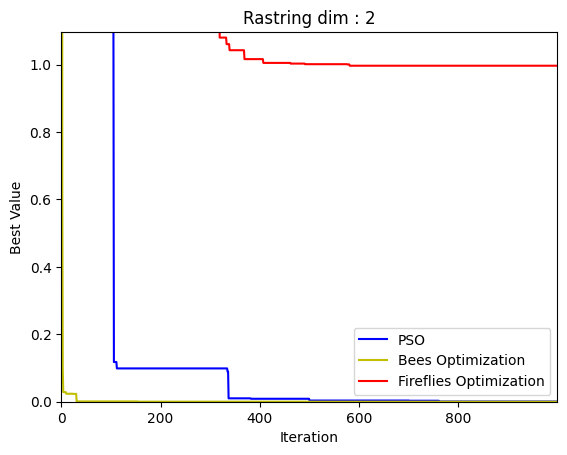

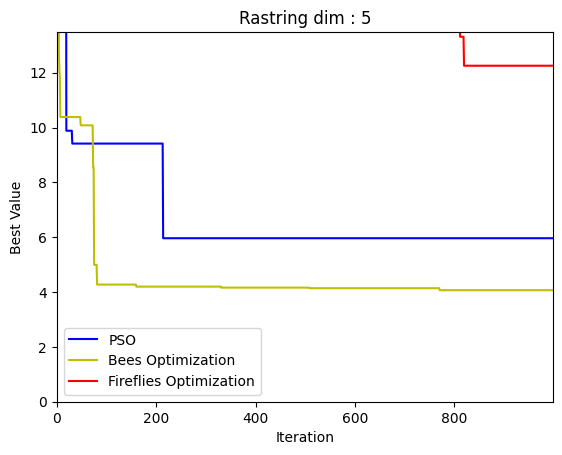

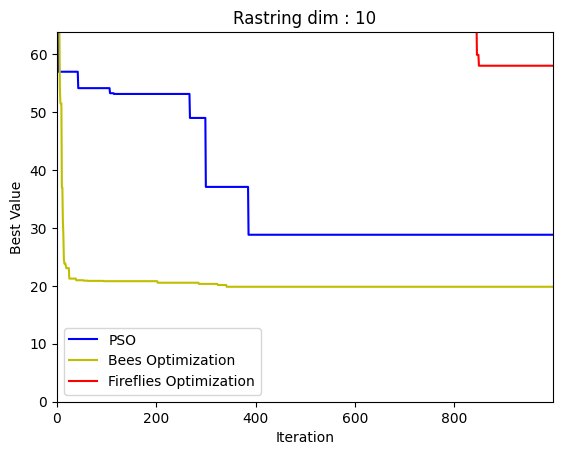

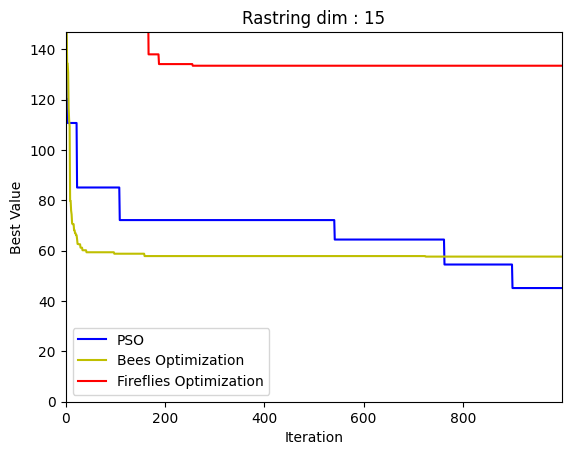

In [ ]:
for i in range(4):
    fig, ax = plt.subplots()
    xdata, y1data, y2data, y3data = [], [], [], []
    ln1, = plt.plot([], [], 'b-', label='PSO')
    ln2, = plt.plot([], [], 'y-', label='Bees Optimization')
    ln3, = plt.plot([], [], 'r-', label='Fireflies Optimization')

    ax.set_xlabel('Iteration')
    ax.set_ylabel('Best Value')
    ax.legend()

    def init():
        ax.set_title(f'Bees Optimization | Best value : ')
        return ln,

    def update(frame):
        xdata.append(frame)
        y1data.append(bsf[i][frame])
        y2data.append(bbf[i][frame])
        y3data.append(bfa[i][frame])
        ax.set_title(f'Rastring dim : {ind[i]}')
        ax.set_xlim(0, frame)
        ax.set_ylim(0, 1.1 * max(bsf[i][frame], bbf[i][frame], bfa[i][frame]))
        ln1.set_data(xdata, y1data)
        ln2.set_data(xdata, y2data)
        ln3.set_data(xdata, y3data)
        return ln1, ln2, ln3,

    from matplotlib.animation import FuncAnimation
    # Створення анімації
    ani = FuncAnimation(fig, update, frames=range(len(bfa[i])), init_func=init, blit=True, interval=50)
    ani.save(f"R_{ind[i]}.gif", fps = 12)

### Функція Мішри-Берда

In [ ]:
def mishra_berda(vec):  # [-10, 0] [-6.5, 0]
    x = vec[0]
    y = vec[1]
    if np.pow(x + 5, 2) + np.pow(y + 5, 2) < 25:
        return np.exp(np.pow(1 - np.cos(x), 2))*np.sin(y) \
            + np.exp(np.pow(1 - np.sin(y), 2))*np.cos(x) + np.pow(x - y, 2)
    else:
        return sys.float_info.max

In [14]:
mb_pso = sw.PSO(mishra_berda, 1000, 25, 2, [-10, -6.5], [0, 0])
mb_ba = sw.BA(mishra_berda, 1000, 25, 2, [-10, -6.5], [0, 0], 15, 10)
mb_fa = sw.FA(mishra_berda, 1000, 25, 2, [-10, -6.5], [0, 0])

C:\Users\berku\AppData\Local\Temp\ipykernel_27108\1331908568.py:23: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, frame)


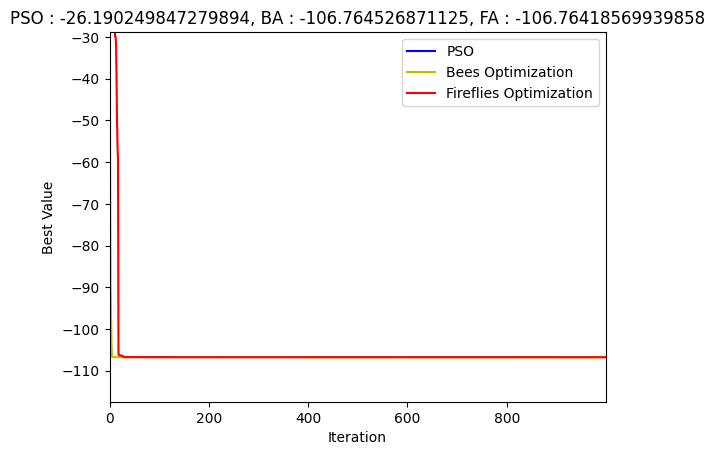

In [20]:
fig, ax = plt.subplots()
xdata, y1data, y2data, y3data = [], [], [], []
ln1, = plt.plot([], [], 'b-', label='PSO')
ln2, = plt.plot([], [], 'y-', label='Bees Optimization')
ln3, = plt.plot([], [], 'r-', label='Fireflies Optimization')

ax.set_xlabel('Iteration')
ax.set_ylabel('Best Value')
ax.legend()

def init():
    ax.set_title(f' ')
    return ln,

def update(frame):
    xdata.append(frame)
    y1data.append(mb_pso[frame])
    y2data.append(mb_ba[frame])
    y3data.append(mb_fa[frame])
    if frame != 0:
        ax.set_title(f'PSO : {min(mb_pso[:frame])}, BA : {min(mb_ba[:frame])}, FA : {min(mb_fa[:frame])}')
        
    ax.set_xlim(0, frame)
    ax.set_ylim(1.1 * min(mb_pso[frame], mb_ba[frame], mb_fa[frame]), 1.1 * max(mb_pso[frame], mb_ba[frame], mb_fa[frame]))
    ln1.set_data(xdata, y1data)
    ln2.set_data(xdata, y2data)
    ln3.set_data(xdata, y3data)
    return ln1, ln2, ln3,

from matplotlib.animation import FuncAnimation
# Створення анімації
ani = FuncAnimation(fig, update, frames=range(len(mb_pso)), init_func=init, blit=True, interval=50)
ani.save(f"MB.gif", fps = 12)


### Функція Розенброка

In [21]:
def rosenbroke(vec):    # [-1.5, 1.5] [-1.5, 1.5]
    x = vec[0]
    y = vec[1]
    
    if x**2 + y**2 < 2:
        return np.pow(1 - x, 2) + 100 * np.pow(y - x**2, 2)
    else:
        return sys.float_info.max

In [31]:
rb_pso = sw.PSO(rosenbroke, 1000, 25, 2, [-1.5, -1.5], [1.5, 1.5])
rb_ba = sw.BA(rosenbroke, 1000, 25, 2, [-1.5, -1.5], [1.5, 1.5], 15, 10)
rb_fa = sw.FA(rosenbroke, 1000, 25, 2, [-1.5, -1.5], [1.5, 1.5])

C:\Users\berku\AppData\Local\Temp\ipykernel_27108\359518117.py:24: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, frame)


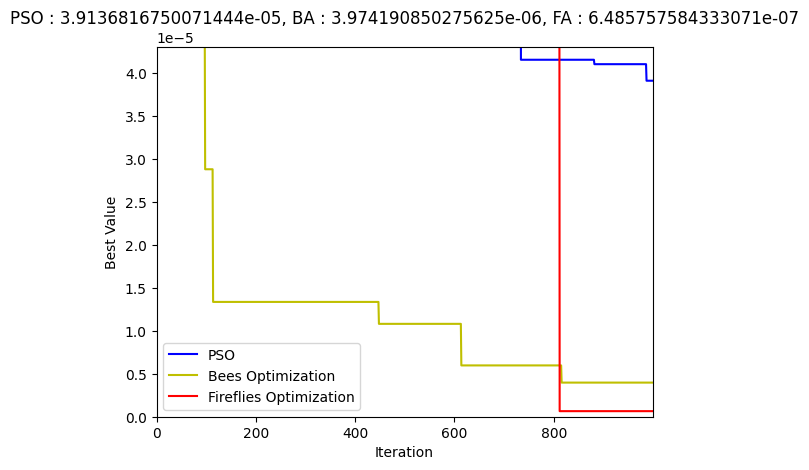

In [ ]:
fig, ax = plt.subplots()
xdata, y1data, y2data, y3data = [], [], [], []
ln1, = plt.plot([], [], 'b-', label='PSO')
ln2, = plt.plot([], [], 'y-', label='Bees Optimization')
ln3, = plt.plot([], [], 'r-', label='Fireflies Optimization')

ax.set_xlabel('Iteration')
ax.set_ylabel('Best Value')
ax.legend()

def init():
    ax.set_title(f' ')
    return ln1, ln2, ln3,

def update(frame):
    xdata.append(frame)
    y1data.append(rb_pso[frame])
    y2data.append(rb_ba[frame])
    y3data.append(rb_fa[frame])
    
    if frame != 0:
        ax.set_title(f'PSO : {min(rb_pso[:frame])}, BA : {min(rb_ba[:frame])}, FA : {min(rb_fa[:frame])}')
    
    ax.set_xlim(0, frame)
    
    ax.set_ylim(0, 1.1 * max(rb_pso[frame], rb_ba[frame], rb_fa[frame]))

    ln1.set_data(xdata, y1data)
    ln2.set_data(xdata, y2data)
    ln3.set_data(xdata, y3data)
    return ln1, ln2, ln3,

from matplotlib.animation import FuncAnimation
# Створення анімації
ani = FuncAnimation(fig, update, frames=range(len(rb_pso)), init_func=init, blit=True, interval=50)
ani.save(f"RB.gif", fps = 12)

### Пунт 5.1

In [23]:
def appliedtask1(x):
    g1 = 27 / (x[0] * x[1]**2 * x[2]) - 1 <= 0
    g2 = 397.5 / (x[0] * x[1]**2 * x[2] ** 2) - 1 <= 0
    g3 = 1.93 * x[3]**3 / (x[1] * x[2] * x[5]**4) - 1 <= 0
    g4 = 1.93 / (x[1] * x[2] * x[6]**4) - 1 <= 0
    g5 = 1 / (110 * x[5]**3) * np.sqrt((745*x[3] / (x[1] * x[2]))**2 + 16.9 * 10**6) - 1 <= 0
    g6 = 1 / (85 * x[6]**3) * np.sqrt((745*x[4] / (x[1] * x[2]))**2 + 157.5 * 10**6) - 1 <= 0
    g7 = (x[1]*x[2]) / 40 - 1 <= 0
    g8 = 5*x[1] / x[0] - 1 <= 0
    g9 = x[0] / (12 * x[1]) - 1 <= 0
    g10 = (1.5 * x[5] + 1.9) / x[3] - 1 <= 0
    g11 = (1.1 * x[6] + 1.9) / x[4] - 1 <= 0
    
    g = g1 and g2 and g3 and g4 and g5 and g6 and g7 and g8 and g9 and g10 and g11
    
    if g:
        return 0.7854*x[0]*x[1]**2 * (3.3333 * x[2]**2 + 14.9334 * x[2] - 43.0934) \
            - 1.508*x[0]*(x[5]**2 + x[6]**2) + 7.4777 * (x[5]**3 + x[6]**3) \
                + 0.7854 * (x[3] * x[5]**2 + x[4] * x[6]**2)
    else:
       return 10**6

In [24]:
at1_pso = sw.PSO(appliedtask1, 1000, 25, 7, [2.6, .7, 17, 7.3, 7.8, 2.9, 5], [3.6, .8, 28, 8.3, 8.3, 3.9, 5.5])
at1_ba = sw.BA(appliedtask1, 1000, 25, 7, [2.6, .7, 17, 7.3, 7.8, 2.9, 5], [3.6, .8, 28, 8.3, 8.3, 3.9, 5.5], 15, 10)
at1_fa = sw.FA(appliedtask1, 1000, 25, 7, [2.6, .7, 17, 7.3, 7.8, 2.9, 5], [3.6, .8, 28, 8.3, 8.3, 3.9, 5.5])

C:\Users\berku\AppData\Local\Temp\ipykernel_30036\2217403772.py:24: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, frame)


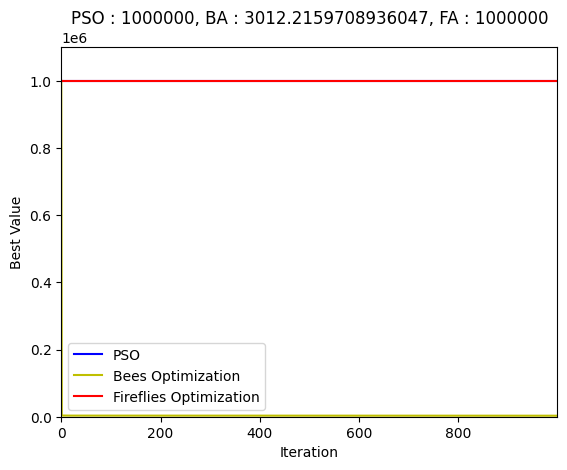

In [25]:
fig, ax = plt.subplots()
xdata, y1data, y2data, y3data = [], [], [], []
ln1, = plt.plot([], [], 'b-', label='PSO')
ln2, = plt.plot([], [], 'y-', label='Bees Optimization')
ln3, = plt.plot([], [], 'r-', label='Fireflies Optimization')

ax.set_xlabel('Iteration')
ax.set_ylabel('Best Value')
ax.legend()

def init():
    ax.set_title(f' ')
    return ln1, ln2, ln3,

def update(frame):
    xdata.append(frame)
    y1data.append(at1_pso[frame])
    y2data.append(at1_ba[frame])
    y3data.append(at1_fa[frame])
    
    if frame != 0:
        ax.set_title(f'PSO : {min(at1_pso[:frame])}, BA : {min(at1_ba[:frame])}, FA : {min(at1_fa[:frame])}')
    
    ax.set_xlim(0, frame)
    
    ax.set_ylim(0, 1.1 * max(at1_pso[frame], at1_ba[frame], at1_fa[frame]))

    ln1.set_data(xdata, y1data)
    ln2.set_data(xdata, y2data)
    ln3.set_data(xdata, y3data)
    return ln1, ln2, ln3,

from matplotlib.animation import FuncAnimation
# Створення анімації
ani = FuncAnimation(fig, update, frames=range(len(at1_pso)), init_func=init, blit=True, interval=50)
ani.save(f"AT1.gif", fps = 12)

### Пункт 5.2

In [26]:
def appliedtask2(x):
    g1 = 1 - (x[1]**3 * x[2]) / (7.178 * x[0]**4) <= 0
    g2 = (4 * x[1] ** 2 - x[0]*x[1]) / (12.566 * x[1] * x[0]**3 - x[0]**4) + 1 / (5.108 * x[0]**2) - 1 <= 0
    g3 = 1 - (140.45 * x[0]) / (x[1]**2 * x[2]) <= 0
    g4 = (x[1] + x[0]) / 1.5 - 1 <= 0
    g = g1 and g2 and g3 and g4
    
    if g:
        return (x[2] + 2)*x[1]*x[0]**2
    else:
        return 10**6

In [27]:
at2_pso = sw.PSO(appliedtask2, 1000, 25, 3, [.005, .25, 2.], [2., 1.3, 15.])
at2_ba = sw.BA(appliedtask2, 1000, 25, 3, [.005, .25, 2.], [2., 1.3, 15.], 15, 10)
at2_fa = sw.FA(appliedtask2, 1000, 25, 3, [.005, .25, 2.], [2., 1.3, 15.])

C:\Users\berku\AppData\Local\Temp\ipykernel_30036\2910883360.py:24: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, frame)


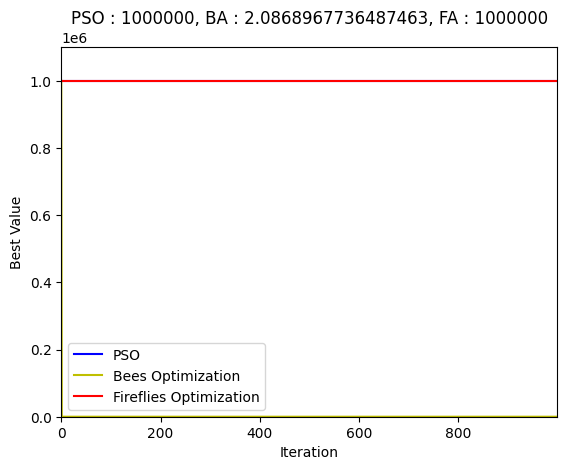

In [28]:
fig, ax = plt.subplots()
xdata, y1data, y2data, y3data = [], [], [], []
ln1, = plt.plot([], [], 'b-', label='PSO')
ln2, = plt.plot([], [], 'y-', label='Bees Optimization')
ln3, = plt.plot([], [], 'r-', label='Fireflies Optimization')

ax.set_xlabel('Iteration')
ax.set_ylabel('Best Value')
ax.legend()

def init():
    ax.set_title(f' ')
    return ln1, ln2, ln3,

def update(frame):
    xdata.append(frame)
    y1data.append(at2_pso[frame])
    y2data.append(at2_ba[frame])
    y3data.append(at2_fa[frame])
    
    if frame != 0:
        ax.set_title(f'PSO : {min(at2_pso[:frame])}, BA : {min(at2_ba[:frame])}, FA : {min(at2_fa[:frame])}')
    
    ax.set_xlim(0, frame)
    
    ax.set_ylim(0, 1.1 * max(at2_pso[frame], at2_ba[frame], at2_fa[frame]))

    ln1.set_data(xdata, y1data)
    ln2.set_data(xdata, y2data)
    ln3.set_data(xdata, y3data)
    return ln1, ln2, ln3,

from matplotlib.animation import FuncAnimation
# Створення анімації
ani = FuncAnimation(fig, update, frames=range(len(at2_pso)), init_func=init, blit=True, interval=50)
ani.save(f"AT2.gif", fps = 12)